<a href="https://colab.research.google.com/github/Jishnu2608/Car-Analysis/blob/main/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import squarify as sq
import networkx as nx

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CarsData.csv to CarsData.csv


In [3]:
df = pd.read_csv("CarsData.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


Dataframe summary

In [5]:
def summary(df):
  print(f'Data Shape : {df.shape}')

  summ = pd.DataFrame(df.dtypes, columns=['Data Type']) #Create a dataframe to store summary statistics of datatypes

  summ['Missing values'] = df.isna().sum() #Calculate and add number of missing values
  summ['Missing percentage'] = (df.isna().sum())/len(df) #Calculate and add percentage of missing values
  summ['Duplicates'] = df.duplicated().sum() #Calculate and add number of duplicate rows
  summ['Uniques'] = df.nunique().values #Calculate and add number of unique values
  summ['Count'] = df.count().values #Calculate and add non-missing count of values

  desc = pd.DataFrame(df.describe(include='all').transpose()) #Create a dataframe to store descriptive statistics

  summ['Min'] = desc['min'].values #Add minimum values for numeric columns
  summ['Max'] = desc['max'].values #Add maximum values for numeric columns
  summ['Average'] = desc['mean'].values #Add average values for numeric columns
  summ['Standard Deviation'] = desc['std'].values #Add SD values for numeric columns

  summ['First Value'] = df.loc[0].values #Add first value of each column
  summ['Second Value'] = df.loc[1].values #Add second value of each column
  summ['Third Value'] = df.loc[2].values #Add third value of each column
  display(summ)

summary(df)



Data Shape : (97712, 10)


,Data Type,Missing values,Missing percentage,Duplicates,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
model,object,0,0.0,0,196,97712,NaN,NaN,NaN,NaN,I10,Polo,2 Series
year,int64,0,0.0,0,27,97712,1970.0,2024.0,2017.066502,2.118661,2017,2017,2019
price,int64,0,0.0,0,13236,97712,450.0,159999.0,16773.487555,9868.552222,7495,10989,27990
transmission,object,0,0.0,0,4,97712,NaN,NaN,NaN,NaN,Manual,Manual,Semi-Auto
mileage,int64,0,0.0,0,42214,97712,1.0,323000.0,23219.475499,21060.882301,11630,9200,1614
fuelType,object,0,0.0,0,5,97712,NaN,NaN,NaN,NaN,Petrol,Petrol,Diesel
tax,int64,0,0.0,0,48,97712,0.0,580.0,120.142408,63.35725,145,145,145
mpg,float64,0,0.0,0,208,97712,0.3,470.8,55.205623,16.181659,60.1,58.9,49.6
engineSize,float64,0,0.0,0,40,97712,0.0,6.6,1.664913,0.558574,1.0,1.0,2.0
Manufacturer,object,0,0.0,0,9,97712,NaN,NaN,NaN,NaN,hyundi,volkswagen,BMW


Check row and column numbers

In [10]:
rows = df.shape[0]
cols = df.shape[1]

print("Rows: ", rows)
print("Columns : ", cols)

Rows:  97712
Columns :  10


Check column data of "Manufacturer"

In [11]:
df['Manufacturer'].unique()

array(['hyundi', 'volkswagen', 'BMW', 'skoda', 'ford', 'toyota', 'merc',
       'vauxhall', 'Audi'], dtype=object)

In [12]:
cols = ["price", "mileage", "tax", "mpg", "engineSize"]
df[cols] = df[cols].astype(float)

In [14]:
df.isnull().sum().sort_values(ascending=False)

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

Distribution of car manufacturing years

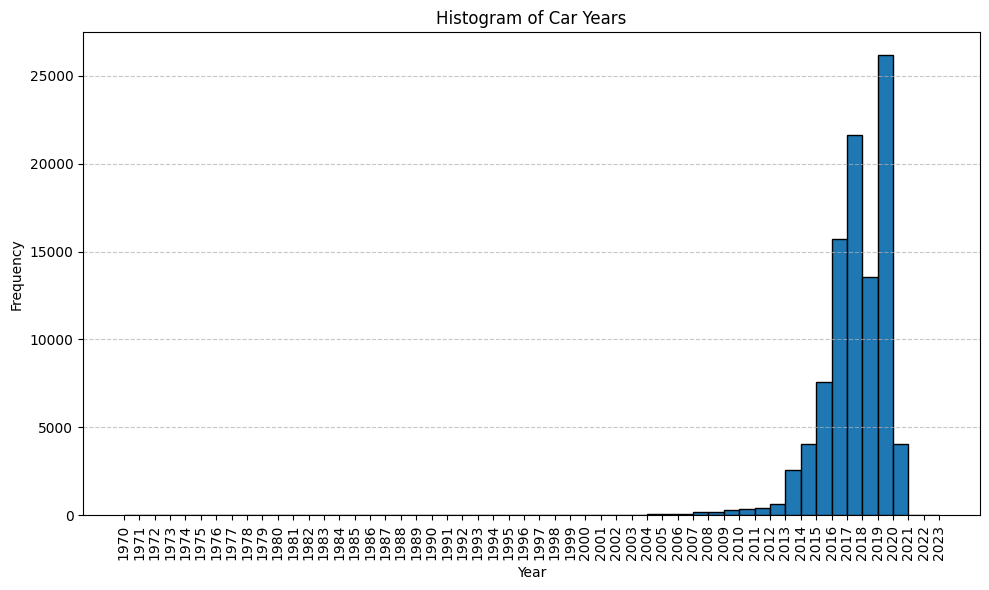

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['year'], bins=range(1970, 2024), edgecolor='black')
plt.title('Histogram of Car Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(range(1970, 2024), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Variation of price over the years

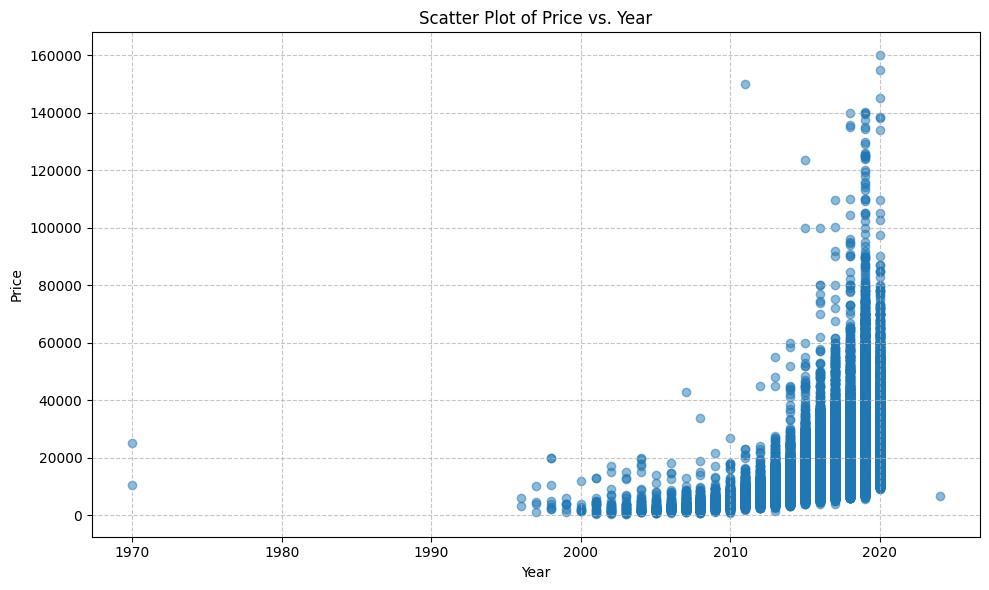

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Comparison of price distribution with different types of transmissions

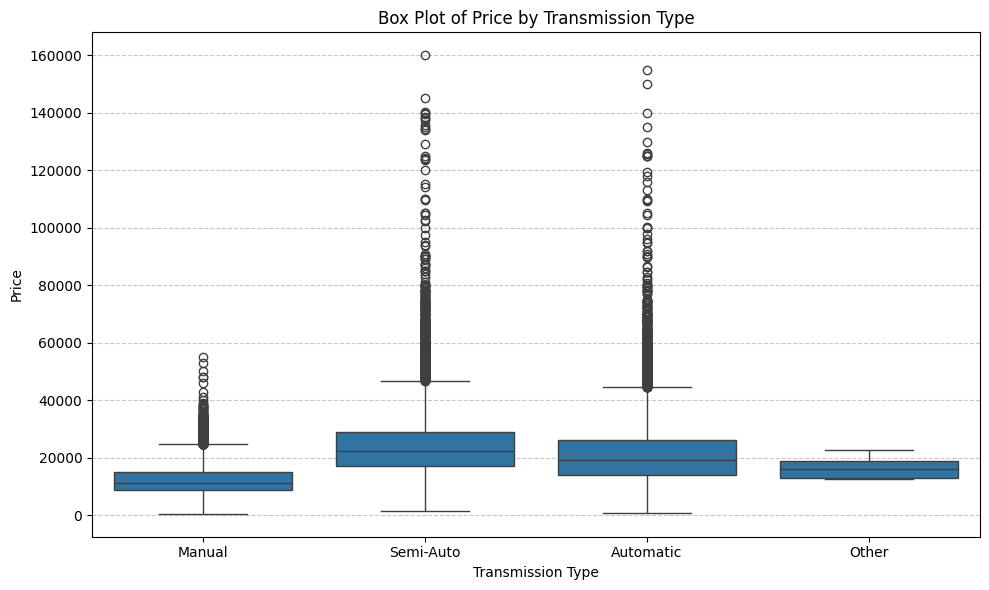

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)  # Assuming 'transmission' is the column name for transmission type
plt.title('Box Plot of Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Frequency of different fuel types

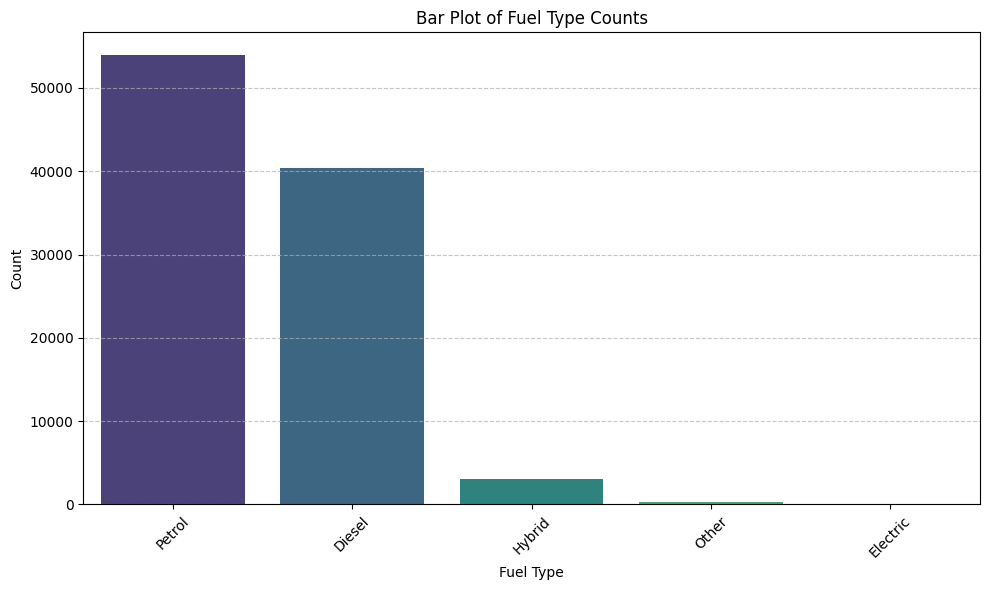

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fuelType', hue='fuelType', data=df, palette='viridis', legend=False)
plt.title('Bar Plot of Fuel Type Counts')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Relationship between a car's engine size and its fuel efficiency (MPG)

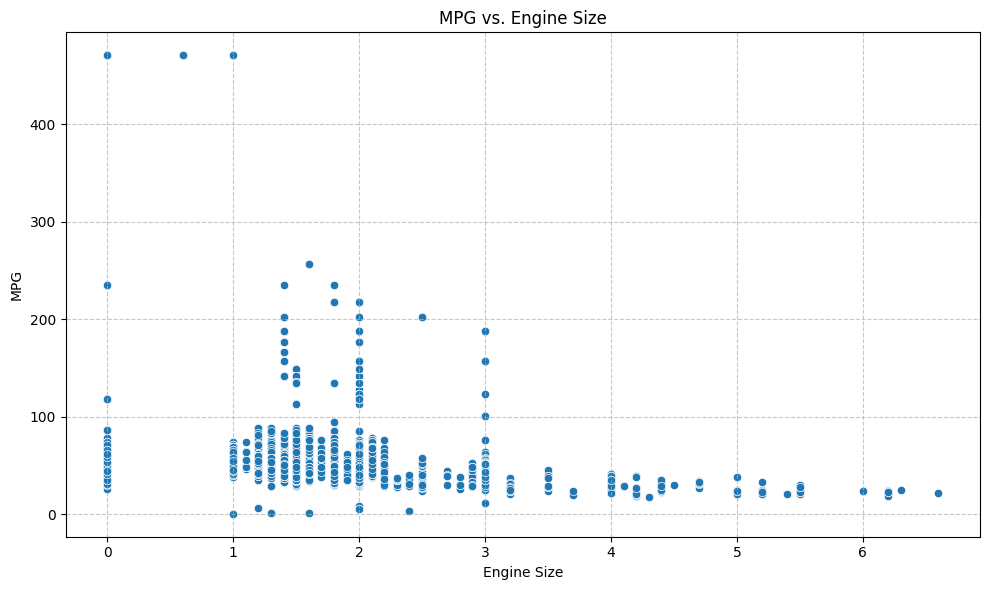

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engineSize', y='mpg', data=df)
plt.title('MPG vs. Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('MPG')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Comparison of price distributions of cars based on their fuel types

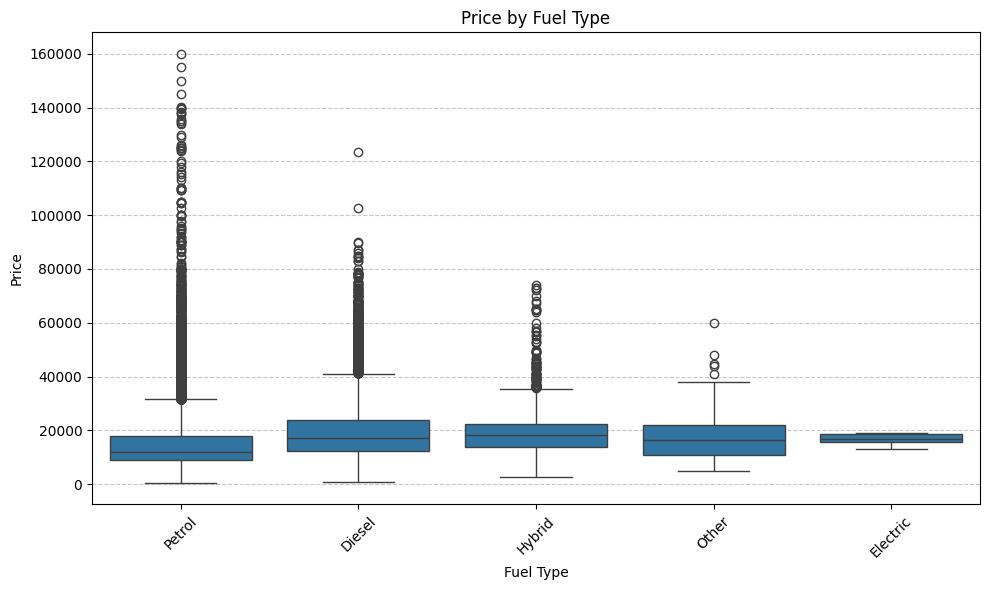

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuelType', y='price', data=df)
plt.title('Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Change in tax rates over the years

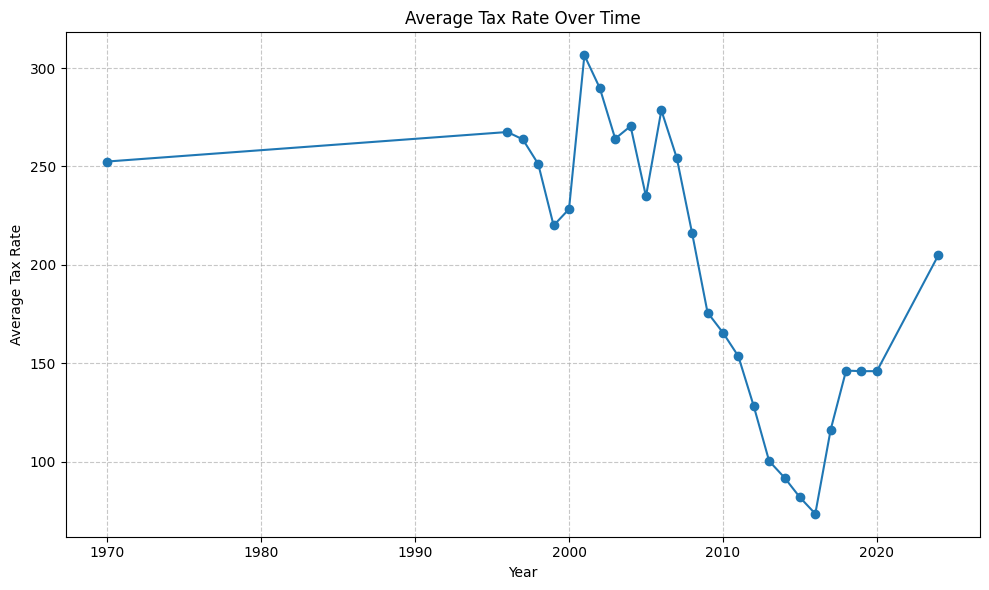

In [28]:
avg_tax_by_year = df.groupby('year')['tax'].mean()

# Generate line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_tax_by_year.index, avg_tax_by_year.values, marker='o', linestyle='-')
plt.title('Average Tax Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Average Tax Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Average price of cars over the years

<ipython-input-31-3ce70c994240>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




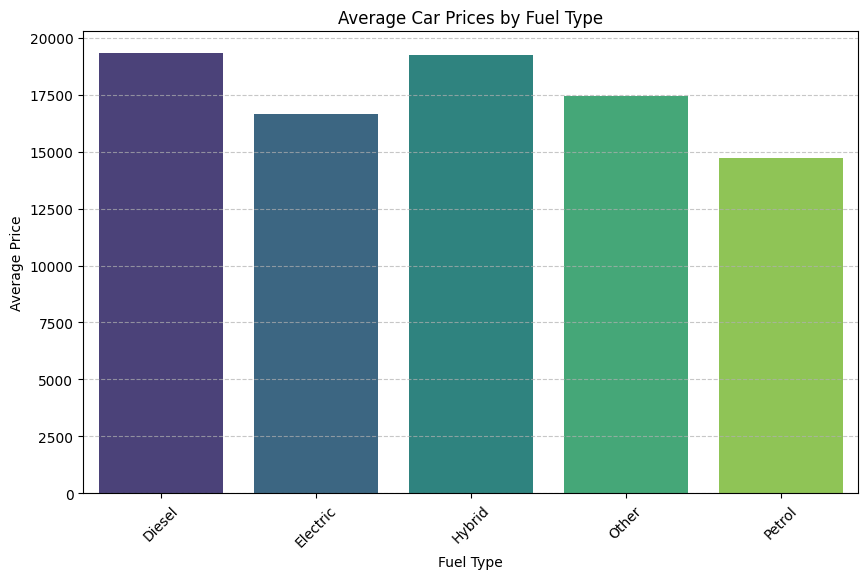

In [31]:
avg_price_by_fuel = df.groupby('fuelType')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='fuelType', y='price', data=avg_price_by_fuel, palette='viridis')
plt.title('Average Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Correlation between price, mileage, MPG, engine size, tax

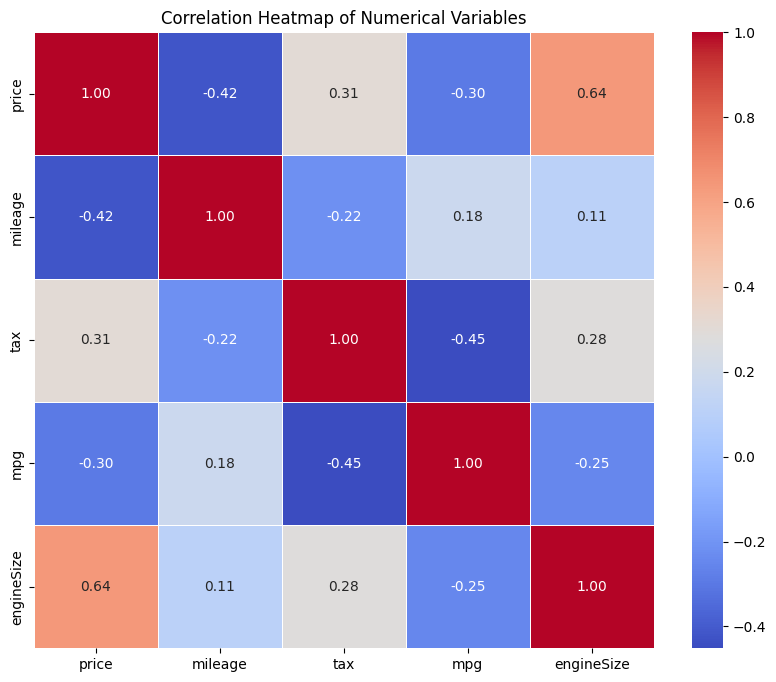

In [32]:
numerical_df = df[cols]

# Calculating correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Relationship between mileage and price considering the impact of transmission type

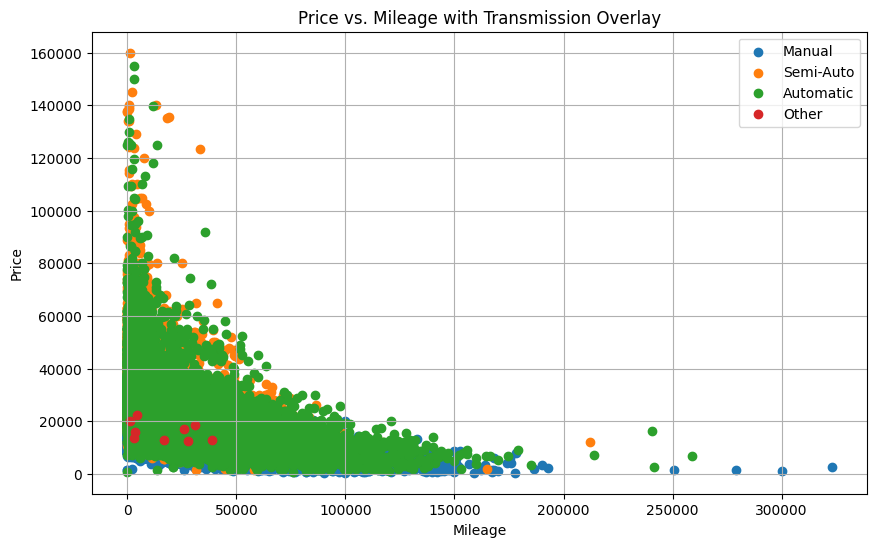

In [33]:
plt.figure(figsize=(10, 6))
transmissions = df['transmission'].unique()
for transmission in transmissions:
    plt.scatter(df[df['transmission'] == transmission]['mileage'], df[df['transmission'] == transmission]['price'], label=transmission)
plt.title('Price vs. Mileage with Transmission Overlay')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Distribution of different fuel types over the years

<Figure size 1500x1000 with 0 Axes>

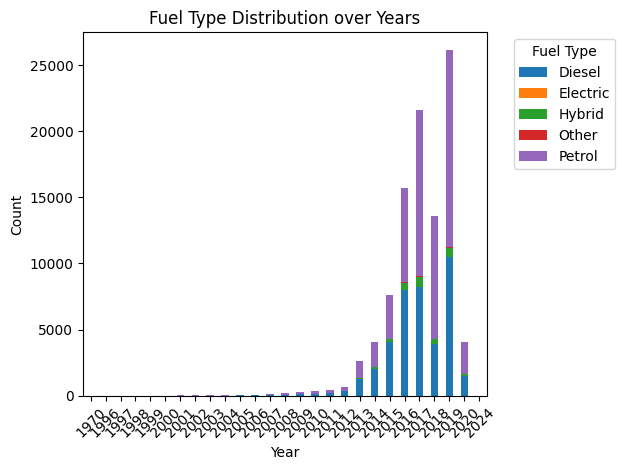

In [35]:
fuel_type_year = df.groupby(['year', 'fuelType']).size().unstack()

# Plotting
plt.figure(figsize=(15, 10))
fuel_type_year.plot(kind='bar', stacked=True)
plt.title('Fuel Type Distribution over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribution of MPG for different transmission types

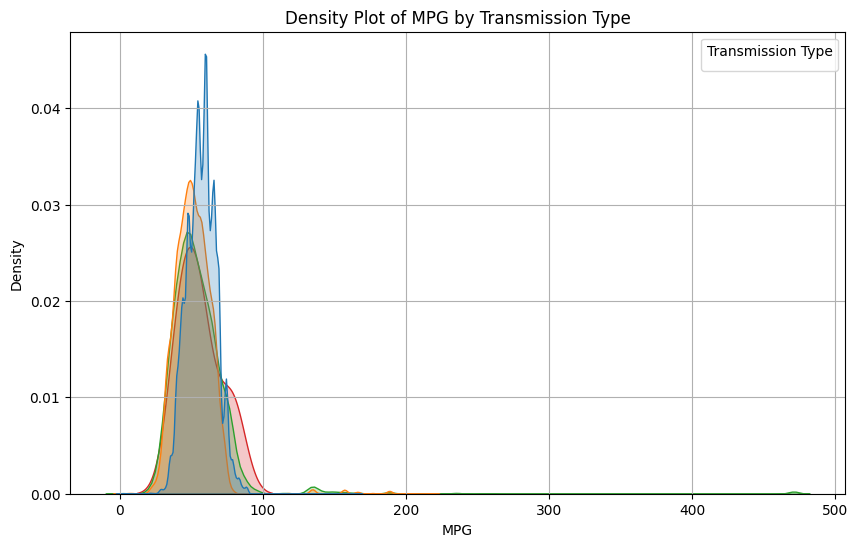

In [36]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='mpg', hue='transmission', fill=True, common_norm=False)
plt.title('Density Plot of MPG by Transmission Type')
plt.xlabel('MPG')
plt.ylabel('Density')
plt.legend(title='Transmission Type')
plt.grid(True)
plt.show()

Market share of each manufacturer based on total price of cars sold.

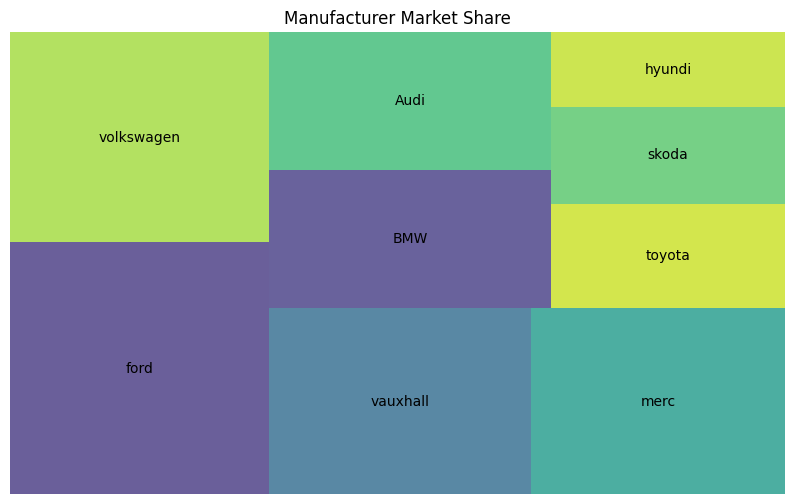

In [43]:
market_share = df['Manufacturer'].value_counts(normalize=True)

# Plotting
plt.figure(figsize=(10, 6))
sq.plot(sizes=market_share.values, label=market_share.index, alpha=0.8)
plt.axis('off')
plt.title('Manufacturer Market Share')
plt.show()

Categorical and numeric variables

In [47]:
# Categorical variables:
cat_cols = df.select_dtypes(include = ['object', 'category']).columns.to_list()

# Numerical variables:
num_cols = df.select_dtypes(include = ['float', 'int']).columns.to_list()

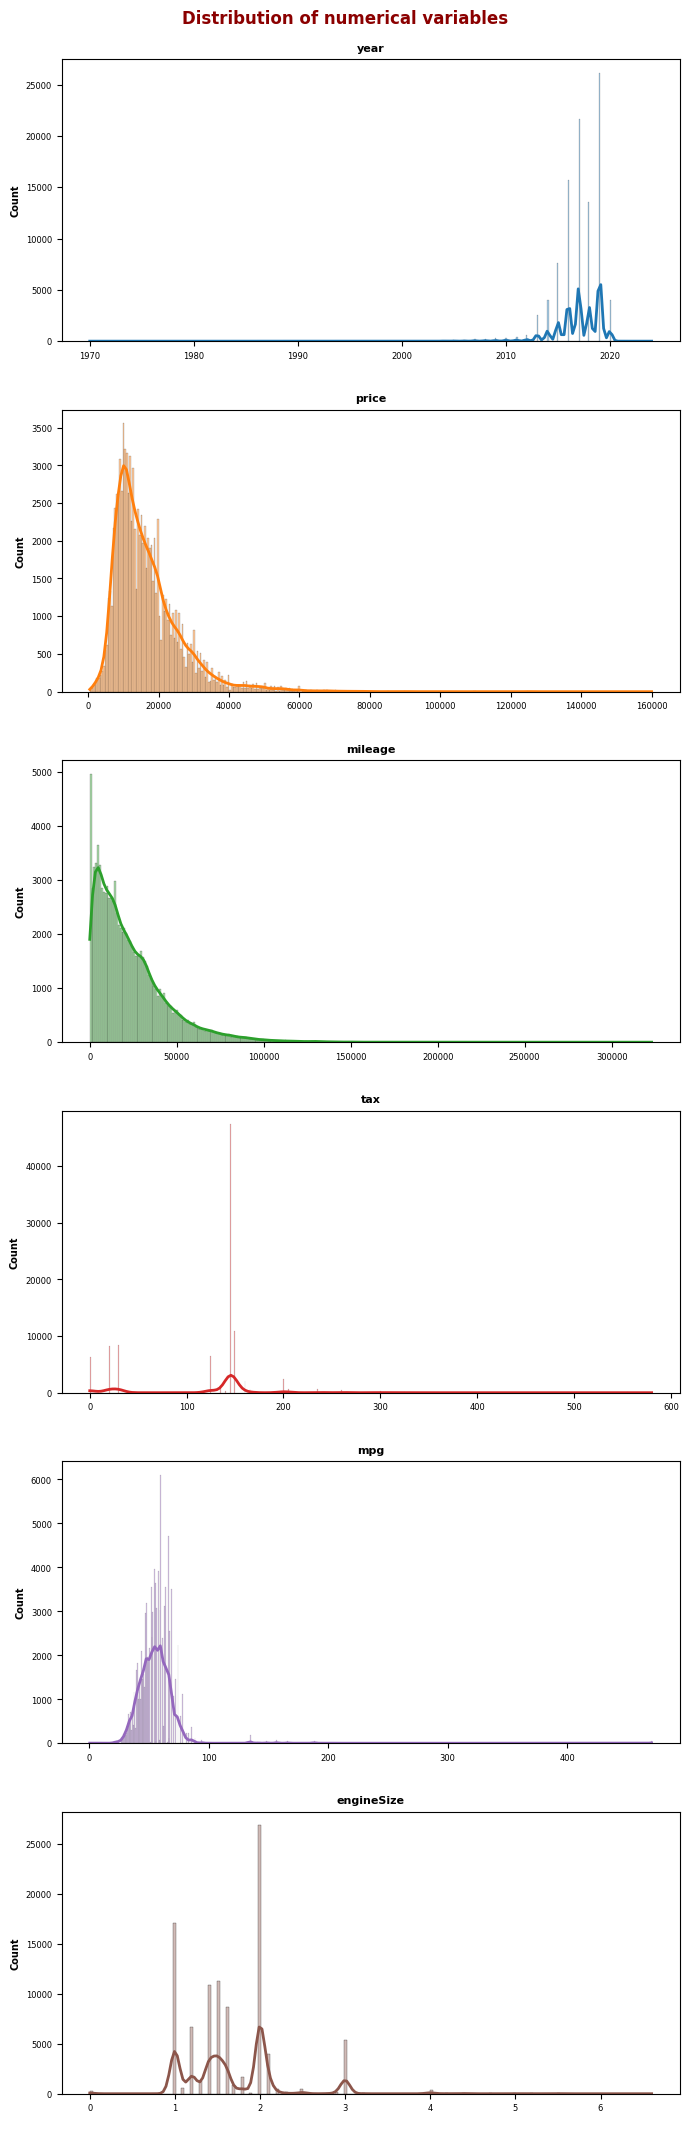

In [49]:
fig,axes = plt.subplots(7, 1, figsize = (7, 25))
axes = axes.flat

for i, num_col in enumerate(num_cols):
  sns.histplot(df,
               x = num_col,
               stat = 'count',
               kde = True,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               line_kws = {'linewidth': 2},
               alpha = 0.4,
               ax = axes[i])

  axes[i].set_xlabel(" ")
  axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
  axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
  axes[i].tick_params(labelsize = 6)

fig.delaxes(axes[6])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'darkred')
fig.tight_layout()
fig.subplots_adjust(top = 0.96)
fig.show()

<ipython-input-50-3c5ec724b350>:28: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-50-3c5ec724b350>:71: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-50-3c5ec724b350>:71: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-50-3c5ec724b350>:71: UserWarning:

FixedFormatter should only be used together with FixedLocator



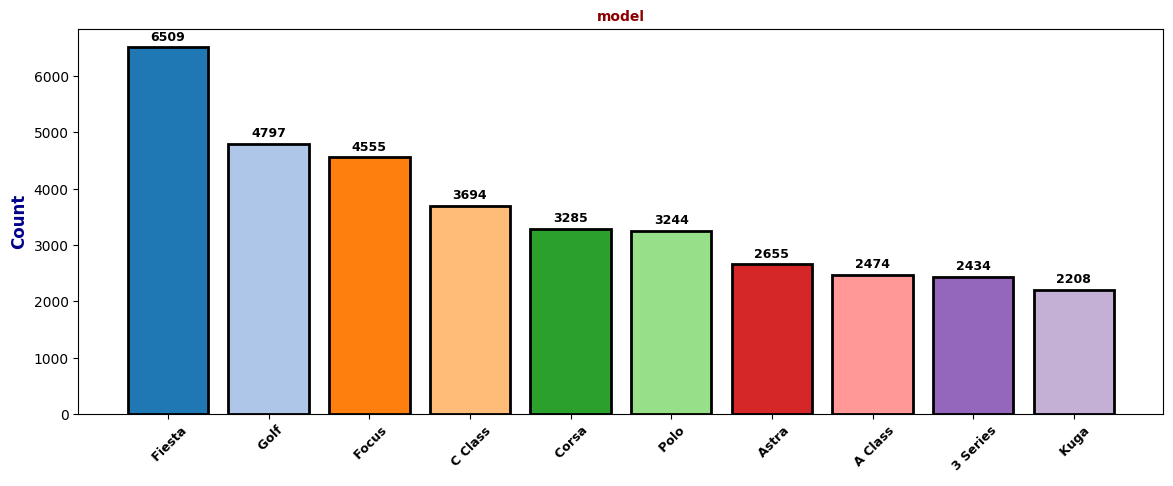

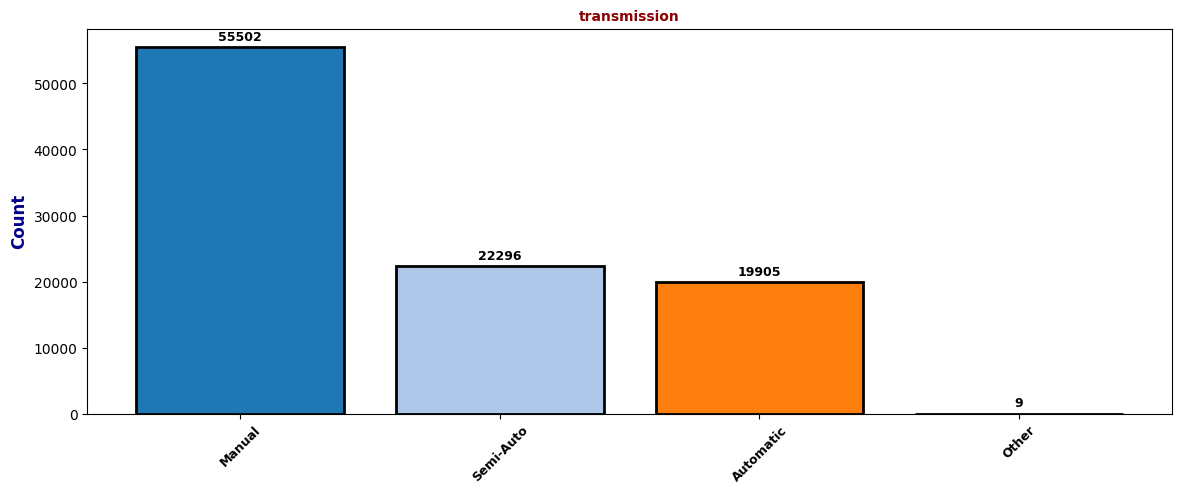

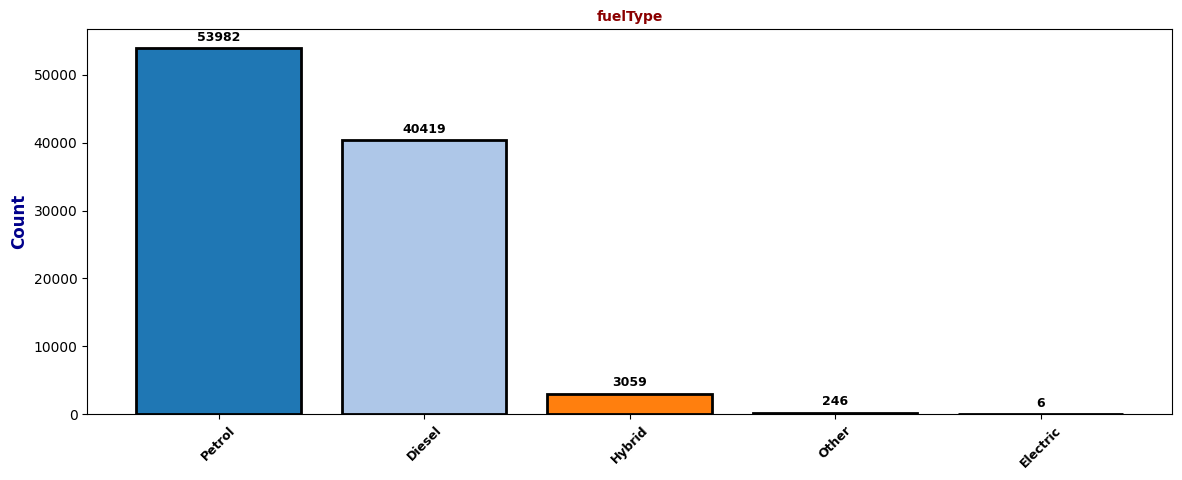

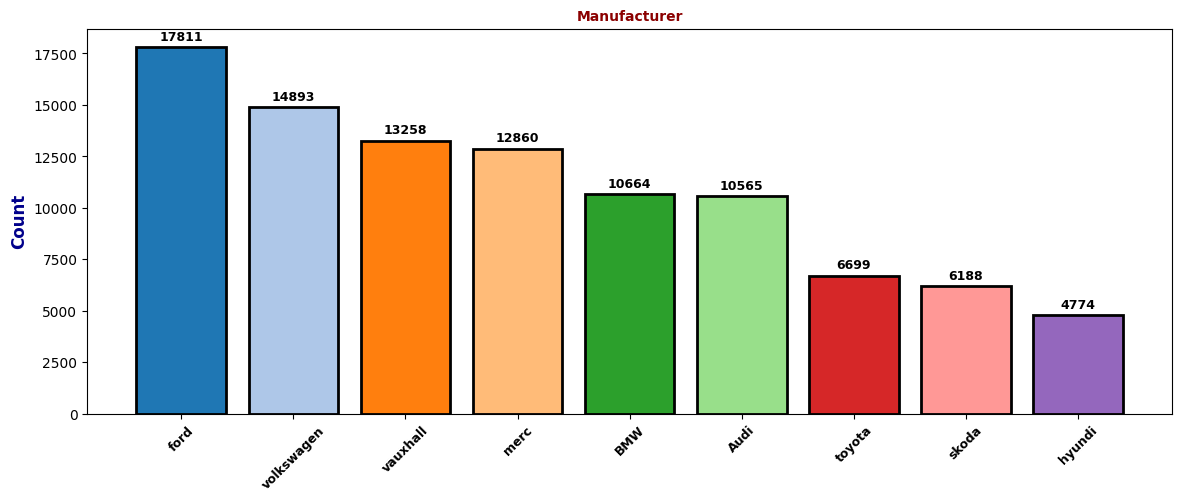

In [50]:

cols = [0, 1, 2, 3]

for i in cols:

        if i == 0:

            # We define the size of our figure.
            fig,ax = plt.subplots(figsize=(14,5))

            # 1. We create our dataframe that contains our data to be displayed.
            df_name = df[cat_cols[0]].value_counts().to_frame().head(10)

            # 2. We generate the values of our graphs.
            values = df_name.iloc[:,0]
            # 3. We generate the labels for our charts.
            labels = df_name.index.to_list()
            # 4. We generate the color map.
            cmap = plt.get_cmap('tab20')
            colors = cmap(np.arange(len(labels)))


            # 2. Bar chart.
            rects = ax.bar(labels, values, color = colors,
                              edgecolor = 'black', linewidth = 2.0)

            ax.set_title(f"{cat_cols[0]}", fontsize = 10, fontweight = 'bold', color = 'darkred')
            ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold', rotation = 45)

            # function to label our bars.
            def autolabel(rects):
              for rect in rects:
                height = rect.get_height()
                ax.annotate(text = '{}'.format(height),
                            xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                            xytext = (0,3),
                            textcoords = 'offset points',
                            va = 'bottom',
                            ha = 'center',
                            weight = 'bold',
                            size = 9,
                            color = 'black')

            autolabel(rects) # we label our bars.

            fig.show()

        else:

            # We define the size of our figure.
            fig,ax = plt.subplots(figsize=(14,5))

            # 1. We create our dataframe that contains our data to be displayed.
            df_name = df[cat_cols[i]].value_counts().to_frame().head(10)

            # 2. We generate the values of our graphs.
            values = df_name.iloc[:,0]
            # 3. We generate the labels for our charts.
            labels = df_name.index.to_list()
            # 4. We generate the color map.
            cmap = plt.get_cmap('tab20')
            colors = cmap(np.arange(len(labels)))


            # 2. Bar chart.
            rects = ax.bar(labels, values, color = colors,
                              edgecolor = 'black', linewidth = 2.0)

            ax.set_title(f"{cat_cols[i]}", fontsize = 10, fontweight = 'bold', color = 'darkred')
            ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold', rotation = 45)

            # function to label our bars.
            def autolabel(rects):
              for rect in rects:
                height = rect.get_height()
                ax.annotate(text = '{}'.format(height),
                            xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                            xytext = (0,3),
                            textcoords = 'offset points',
                            va = 'bottom',
                            ha = 'center',
                            weight = 'bold',
                            size = 9,
                            color = 'black')

            autolabel(rects) # we label our bars.

            fig.show()

Price x categorical columns

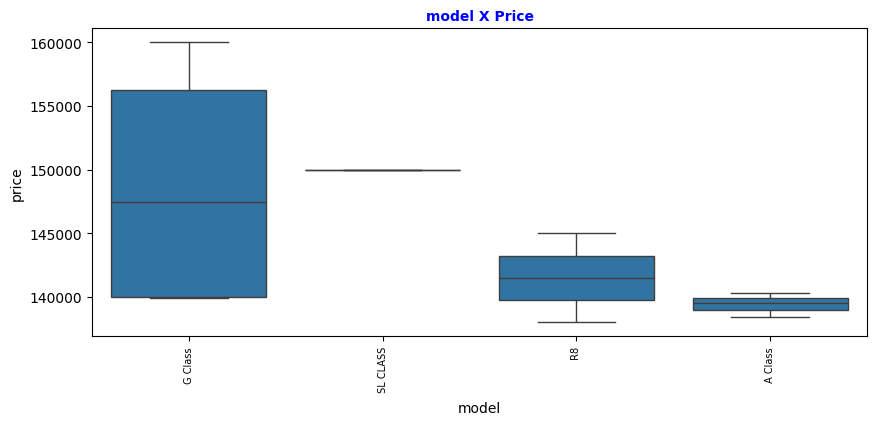

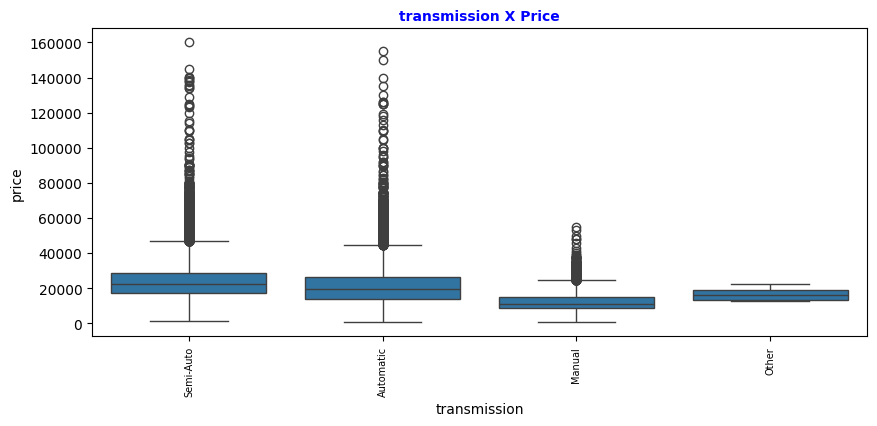

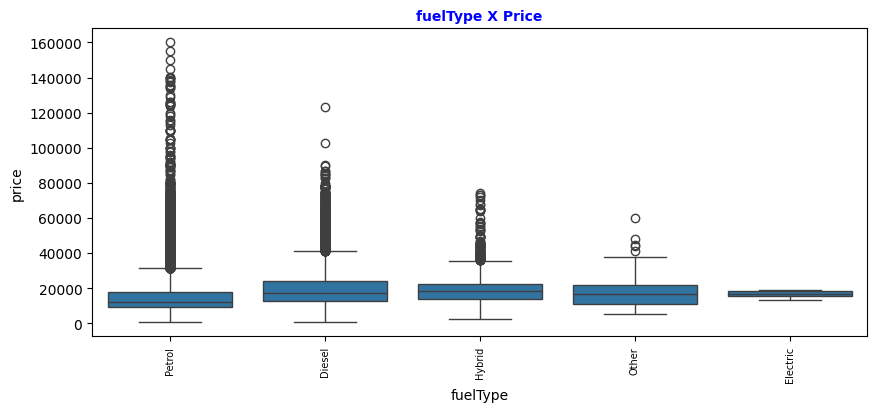

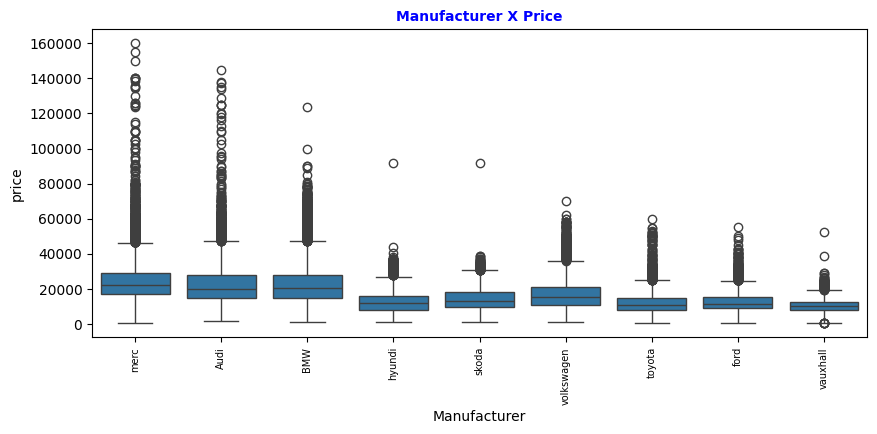

In [51]:
cols = [0, 1, 2, 3]

df_top = df.sort_values(["price"], axis=0, ascending=False)

for i in cols:
        fig, ax = plt.subplots(figsize=(10, 4))

        if i == 0:
                sns.boxplot(x = 'model', y = 'price', data = df_top.head(10))
                ax.set_title(f"{cat_cols[i]}" + " X Price", fontsize = 10, fontweight = 'bold', color = 'blue')
                plt.xticks(rotation=90, fontsize = 7)
                plt.show()

        else:
                sns.boxplot(x = cat_cols[i], y = 'price', data = df_top)
                ax.set_title(f"{cat_cols[i]}"+ " X Price", fontsize = 10, fontweight = 'bold', color = 'blue')
                plt.xticks(rotation=90, fontsize = 7)
                plt.show()

Year x numeric columns

<ipython-input-52-9607aaf0a03f>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




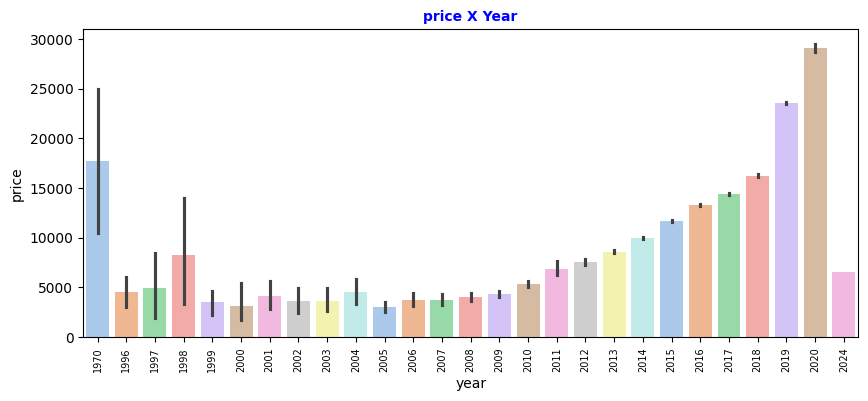

<ipython-input-52-9607aaf0a03f>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




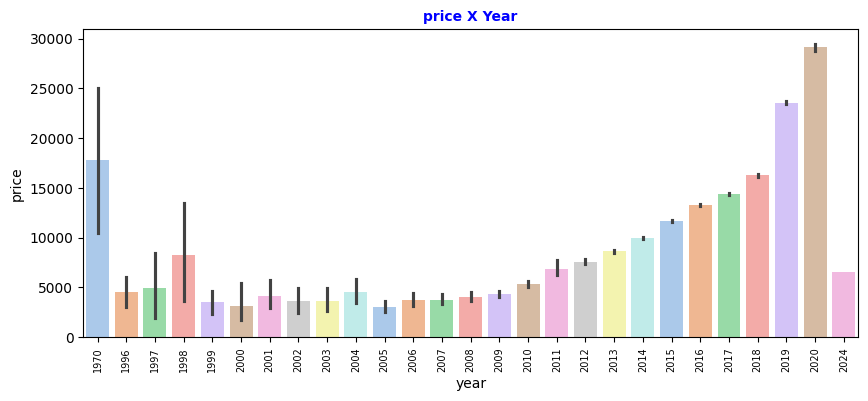

<ipython-input-52-9607aaf0a03f>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




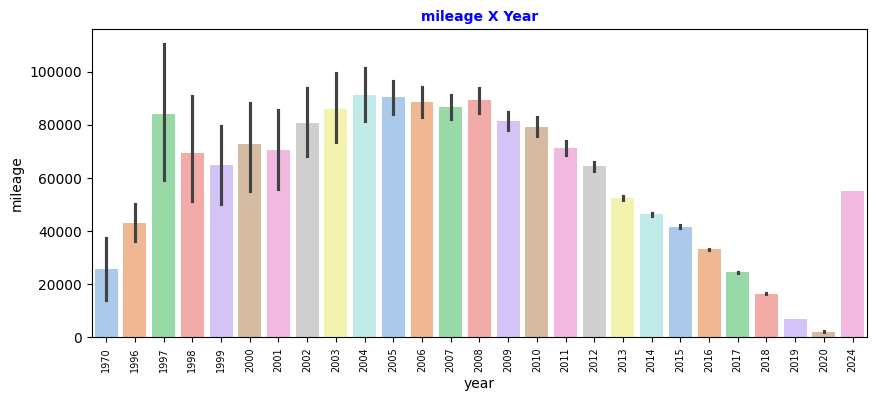

<ipython-input-52-9607aaf0a03f>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




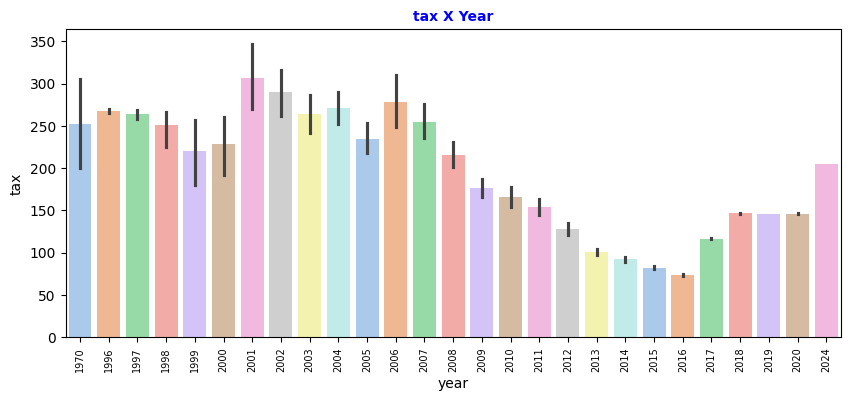

<ipython-input-52-9607aaf0a03f>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




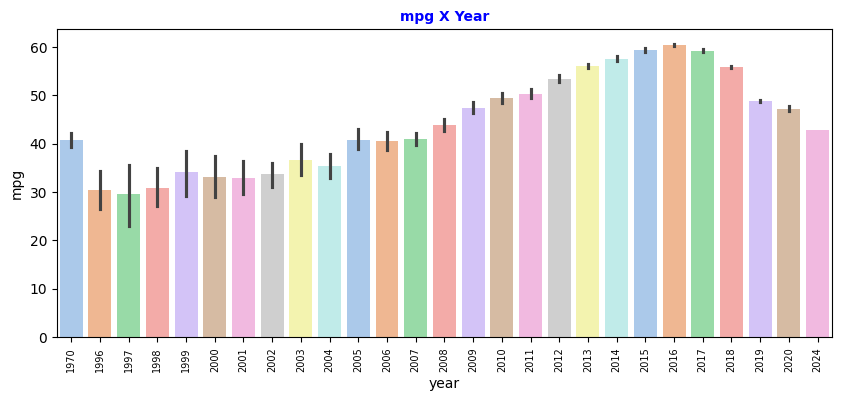

<ipython-input-52-9607aaf0a03f>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




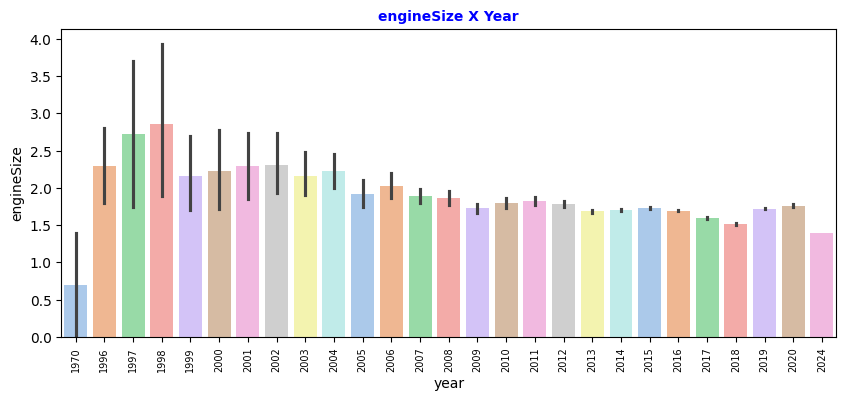

In [52]:
for i in num_cols:
        fig, ax = plt.subplots(figsize=(10, 4))

        if i == 'year':
            sns.barplot(data=df, x = 'year', y = 'price', palette="pastel")
            ax.set_title('price'  + " X Year", fontsize = 10, fontweight = 'bold', color = 'blue')
            plt.xticks(rotation=90, fontsize = 7)
            plt.show()
        else:
            sns.barplot(data=df, x = 'year', y = i, palette="pastel")
            ax.set_title(f"{i}"+ " X Year", fontsize = 10, fontweight = 'bold', color = 'blue')
            plt.xticks(rotation=90, fontsize = 7)
            plt.show()

Similarities/differences between manufacturers using network graph where each node represents a manufacturer and edges between nodes represent relationships based on shared characteristics such as FuelType or Transmission.

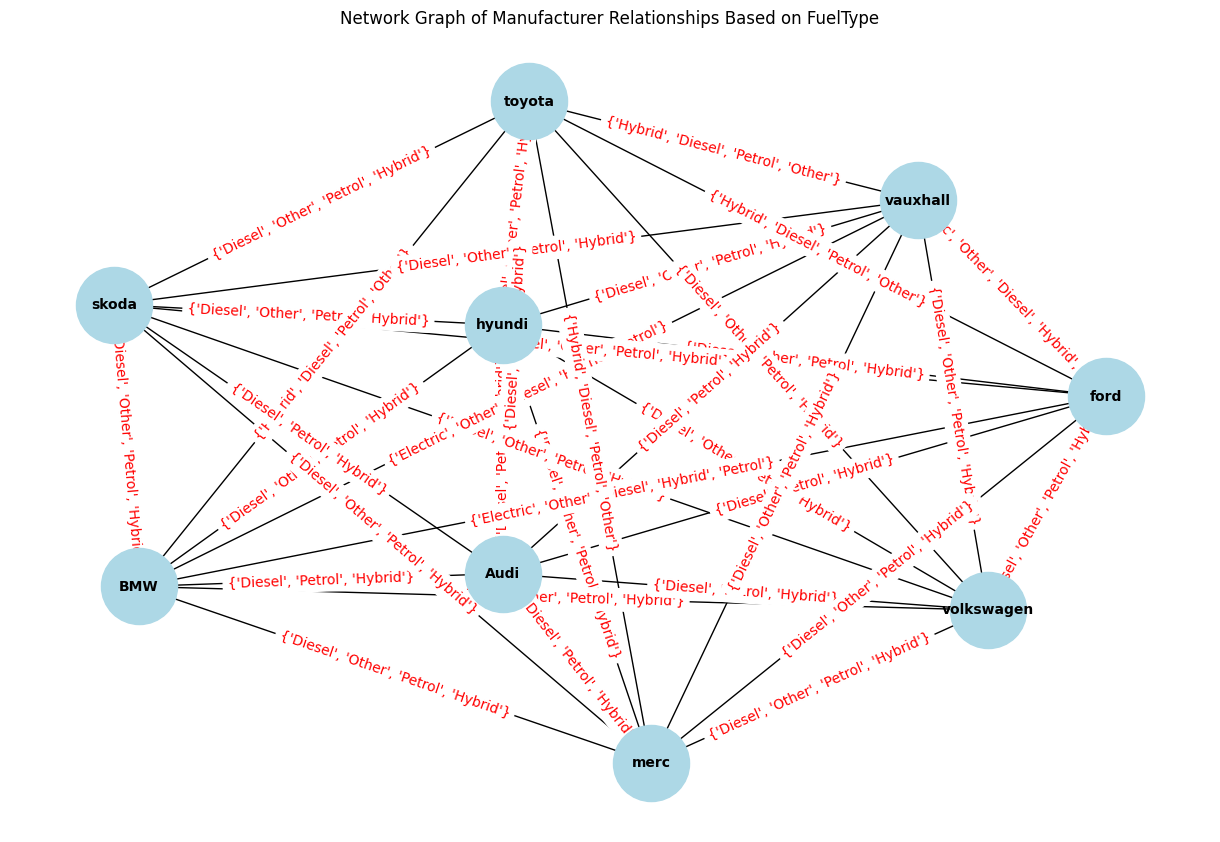

In [58]:
G = nx.Graph()

# Add edges between manufacturers based on shared FuelType
manufacturers = df['Manufacturer'].unique()
for manufacturer1 in manufacturers:
    for manufacturer2 in manufacturers:
        if manufacturer1 != manufacturer2:
            fuel_types1 = set(df[df['Manufacturer'] == manufacturer1]['fuelType'])
            fuel_types2 = set(df[df['Manufacturer'] == manufacturer2]['fuelType'])
            shared_fuel_types = fuel_types1.intersection(fuel_types2)
            if shared_fuel_types:
                G.add_edge(manufacturer1, manufacturer2, shared_fuel_types=shared_fuel_types)

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'shared_fuel_types')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title('Network Graph of Manufacturer Relationships Based on FuelType')
plt.show()

Distribution of mileage over the years

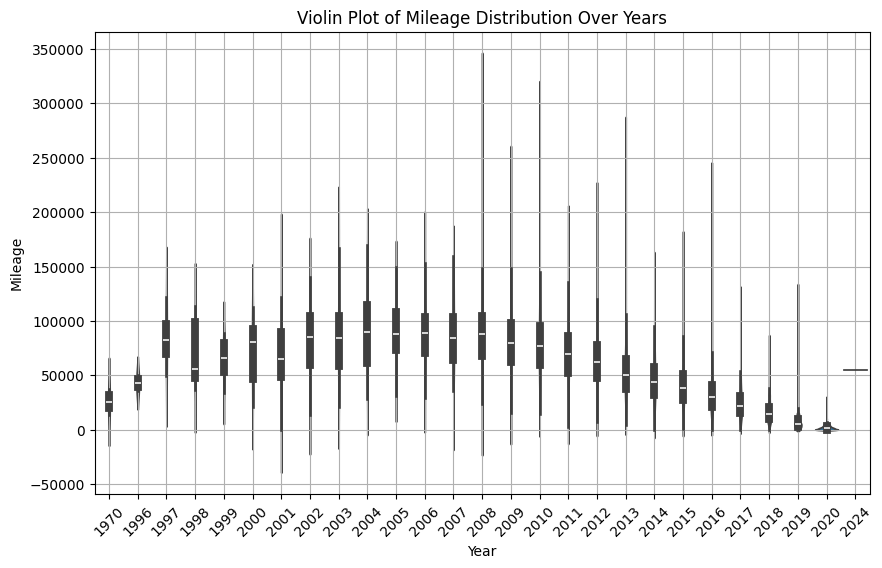

In [59]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='year', y='mileage', data=df)
plt.title('Violin Plot of Mileage Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Correlations between price, mileage, engine size with different markers representing different transmission types

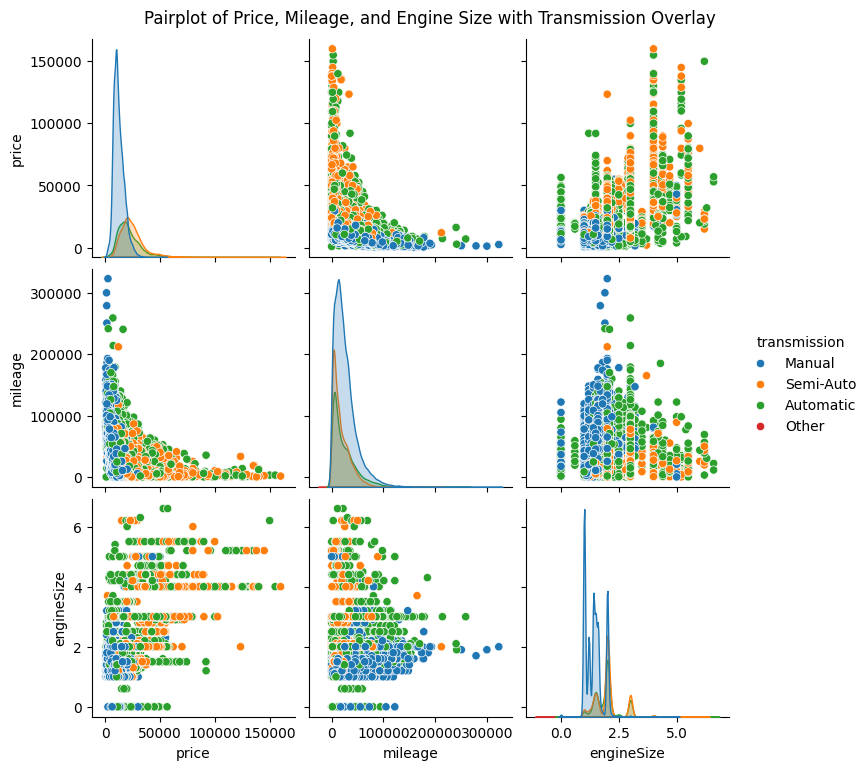

In [60]:
sns.pairplot(df, vars=['price', 'mileage', 'engineSize'], hue='transmission')
plt.suptitle('Pairplot of Price, Mileage, and Engine Size with Transmission Overlay', y=1.02)
plt.show()

Relationship between price, mileage, engine size while indicating density of data points

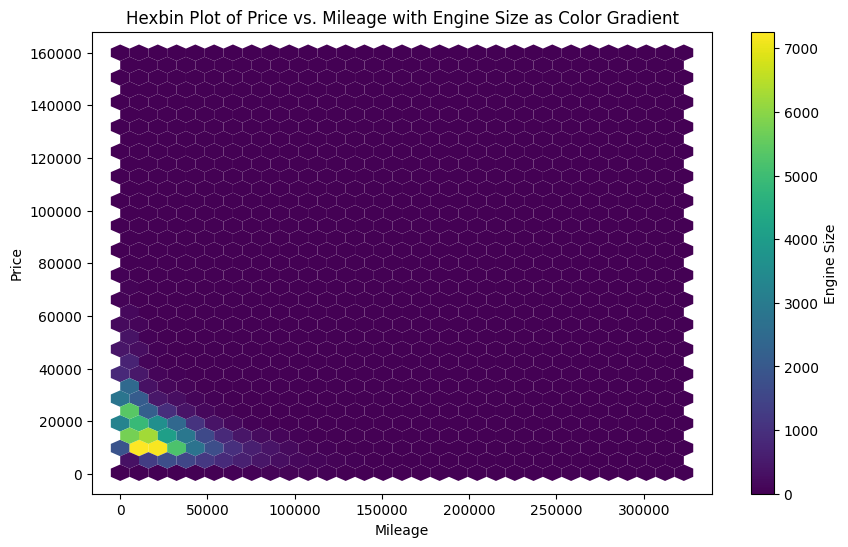

In [61]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['mileage'], df['price'], gridsize=30, cmap='viridis', edgecolors='none')
plt.colorbar(label='Engine Size')
plt.title('Hexbin Plot of Price vs. Mileage with Engine Size as Color Gradient')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Comprehensive overview of features of different cars

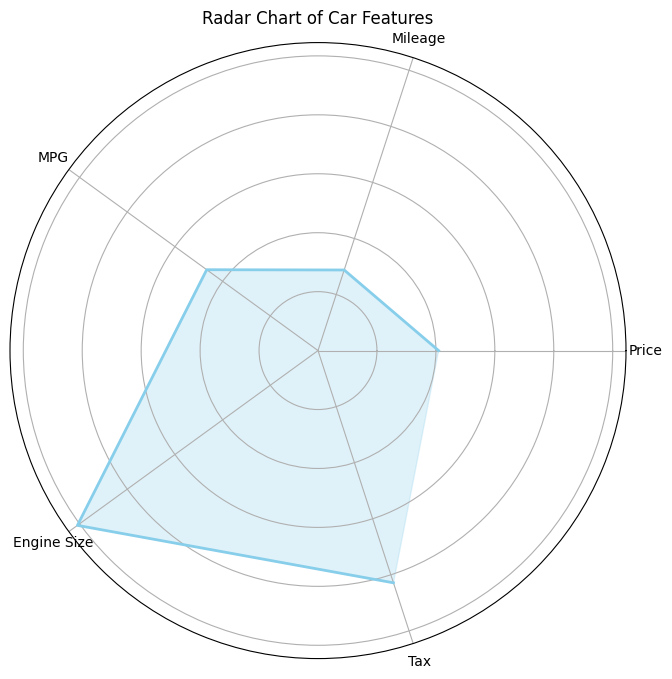

In [63]:
df_norm = df[['price', 'mileage', 'mpg', 'engineSize', 'tax']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plotting
labels=np.array(['Price', 'Mileage', 'MPG', 'Engine Size', 'Tax'])
stats=df_norm.mean().values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='skyblue', alpha=0.25)
ax.plot(angles, stats, color='skyblue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels)
plt.title('Radar Chart of Car Features')
plt.show()